<a href="https://colab.research.google.com/github/anderson02aa/Pos_de_IA_na_UFV-2024/blob/main/ELT574_11850_3_Atividade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELT574 - Atividade 4 da disciplina Aprendizado de Máquinas**

##<center>Semana 4 - Lógica Fuzzy</center>

**<p>&nbsp;&nbsp;&nbsp;Curso de Especialização em Inteligência Artificial e Computacional da UFV em 2024.</p>**
<br>
<p>&nbsp;&nbsp;&nbsp;Professor: Rodolpho Neves</p>



<p>&nbsp;&nbsp;&nbsp;Preparação do ambiente de programação e importação das principais bibliotecas.</p>

##Enunciado:


<table><tr><td>&nbsp;&nbsp;&nbsp;<font size=4>
Crie um Notebook no Google Colab com o nome (ELT574 Matrícula Atividade 4), modificando o campo Matrícula pela sua <br>matrícula do Sapiens (Exemplo: ELT574 12700-0 Atividade 4). Conforme o roteiro abaixo, responda os questionamento e <br>
implemente rotinas para realizar os cálculos necessários.<br><br>
&nbsp;&nbsp;&nbsp;No material disponibilizado na disciplina, apostila e aulas gravadas, foi construído um sistema de inferência fuzzy Mamdani  <br>para sugerir a gorjeta para garçons em um restaurante. Utilizando este sistema, calcule a saída para as entradas:<br>
<center>Comida = 3 e Serviço = 8</center>
<center>Comida = 8 e Serviço = 6</center><br>
&nbsp;&nbsp;&nbsp;É possível alcançar o valor máximo de gorjeta?<br><br>
&nbsp;&nbsp;&nbsp;Implemente o exemplo da gorjeta para o garçom utilizando o método de inferência Takagi-Sugeno-Kang com as<br>
funções das regras propostas na atividade. Calcule a saída para ambas as entradas do item 1. É possível alcançar o <br>valor máximo de gorjeta neste tipo de inferência?<br><br>
&nbsp;&nbsp;&nbsp;Todas as questões devem ser inseridas no notebook do Google Colab. O link para o notebook deve ser enviado como <br>resposta da tarefa.
</font>
<br>
</td></tr></table>

<p>&nbsp;&nbsp;&nbsp;

# Parte 1 - Sistema de Lógica Fuzzy

In [87]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup 1 de 3 completo!')

Setup 1 de 3 completo!


In [88]:
!pip install simpful
import simpful as sf
print('Setup 2 de 3 completo!')

Setup 2 de 3 completo!


<p>&nbsp;&nbsp;&nbsp;Simpful é uma biblioteca em Python para lógica fuzzy, desenvolvida para ser uma API simples e leve, o mais próximo possível da linguagem natural.</p>

<center>https://simpful.readthedocs.io/en/latest/ </center>

In [89]:
from simpful import FuzzySet, FuzzyAggregator
from numpy import prod, mean, max, min
print('Setup 3 de 3 completo!')

Setup 3 de 3 completo!


### Parte 2 - Métodos de inferência: Mamdani

<p>&nbsp;&nbsp;&nbsp;&nbsp;Carregando dependências:</p>

In [90]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



####1. Qualidade do serviço (*Service quality*)

<p>&nbsp;&nbsp;&nbsp;&nbsp;Definindo as variáveis de entrada para qualidade do serviço:</p>

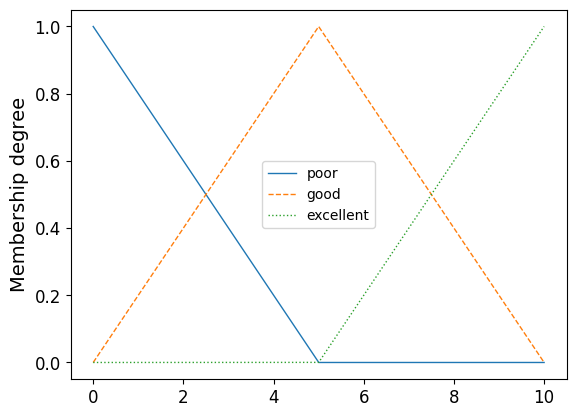

In [91]:
S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor") # saida = [0% 100% 0%]
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality", universe_of_discourse=[0,10]))

sf.LinguisticVariable([S_1, S_2, S_3], universe_of_discourse=[0, 10]).plot()

####2. Qualidade da comida (*Food quality*)

<p>&nbsp;&nbsp;&nbsp;&nbsp;Definindo as variáveis de entrada para qualidade da comida:</p>

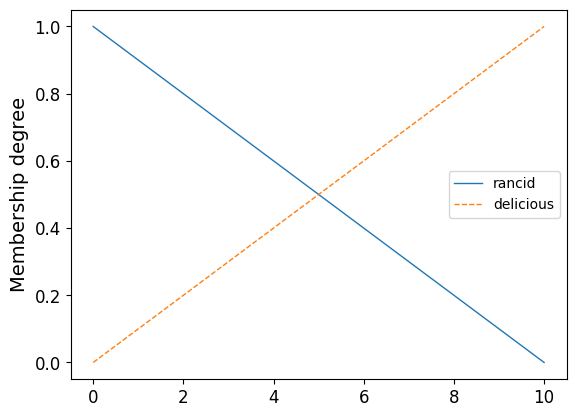

In [92]:
F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="rancid")
F_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=10), term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality", universe_of_discourse=[0,10]))

sf.LinguisticVariable([F_1,F_2], universe_of_discourse=[0, 10]).plot()

####3. Definindo a variável de saída (Tip)

<p>&nbsp;&nbsp;&nbsp;&nbsp;Definindo as variáveis de saída para Gorjeta (Tip):</p>

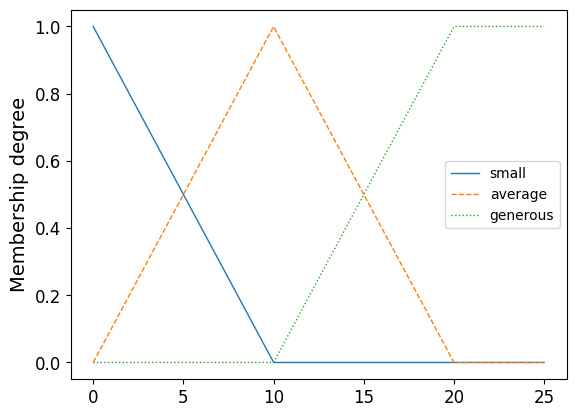

In [93]:
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="small")
T_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=20), term="average")
T_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term="generous") # [0%, 100%, 100%, 0%]
FS.add_linguistic_variable("Tip", LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0,25]))

sf.LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0, 25]).plot()

####4. Regras

In [94]:
R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])

####5. Repassando valores (Serviço=4 e Comida=8)

Repassando os valores de entrada:
Serviço = 3 e Comida = 8

In [95]:
servico = 3
comida = 8
FS.set_variable("Service", servico)
FS.set_variable("Food", comida)

Calculando o valor de inferência

In [96]:
print(FS.Mamdani_inference(["Tip"])) # ou FS.Mamdani_inference(["Tip"])

{'Tip': 14.507972532054279}


####5. Repassando valores (Serviço=8 e Comida=6)

Repassando os valores de entrada:
Serviço = 8 e Comida = 6

In [97]:
servico = 8
comida = 6
FS.set_variable("Service", servico)
FS.set_variable("Food", comida)
print(FS.Mamdani_inference(["Tip"])) # ou FS.Mamdani_inference(["Tip"])

{'Tip': 14.640880699744438}


####5. É possível alcaçar o máximo da gosrjeta?


Repassando os valores de entrada:
Serviço = 10 e Comida = 10

In [98]:
servico = 10
comida = 10
FS.set_variable("Service", servico)
FS.set_variable("Food", comida)
print(FS.Mamdani_inference(["Tip"]))

{'Tip': 19.59010549203194}


Agora imprimindo todos os resultados possíveis, considerando todos os valores inteiros dentro do range (1 até 10) possível para Comida e Serviço:

In [105]:
for xcomida in range(0,12):
    for xservico in range(0,12):
      #flag=0
      FS.set_variable("Service", xservico)
      FS.set_variable("Food", xcomida)
      #if  (FS.Mamdani_inference(["Tip"]) )>24:
      print(FS.Mamdani_inference(["Tip"])) # ou FS.Mamdani_inference(["Tip"])
      #flag=1




{'Tip': 3.325001663332497}
{'Tip': 6.539383241755193}
{'Tip': 8.236354983739359}
{'Tip': 9.24134625993856}
{'Tip': 9.80702026991977}
{'Tip': 10.000005015035075}
{'Tip': 11.333421094665548}
{'Tip': 12.856625516472338}
{'Tip': 14.640880699744438}
{'Tip': 16.8100667127398}
{'Tip': 19.59010549203194}
{'Tip': 19.59010549203194}
{'Tip': 6.614342634585854}
{'Tip': 7.715782323761559}
{'Tip': 9.118252386520535}
{'Tip': 9.97629269704127}
{'Tip': 10.469436900524343}
{'Tip': 10.639940211337445}
{'Tip': 11.333421094665548}
{'Tip': 12.856625516472338}
{'Tip': 14.640880699744438}
{'Tip': 16.8100667127398}
{'Tip': 19.59010549203194}
{'Tip': 19.59010549203194}
{'Tip': 8.796374197898604}
{'Tip': 8.856461663940156}
{'Tip': 9.992465152348975}
{'Tip': 10.713025598407947}
{'Tip': 11.136987164711861}
{'Tip': 11.285809740653697}
{'Tip': 11.333421094665548}
{'Tip': 12.856625516472338}
{'Tip': 14.640880699744438}
{'Tip': 16.8100667127398}
{'Tip': 19.59010549203194}
{'Tip': 19.59010549203194}
{'Tip': 10.46273854

#=============== RESPOSTAS da 1o. parte: ===============

<h1><b>* Resposta do item 1 da primeira parte:</b></h1>
<h1>&nbsp;&nbsp;&nbsp;Para Serviço = 3 e Comida = 8 foi obtido: {'Tip': 14.507972532054279}</h1>

<h1><b>* Resposta do item 2 da primeira parte:</b></h1>
<h1>&nbsp;&nbsp;&nbsp;Para Serviço = 8 e Comida = 6 foi obtido:  {'Tip': 14.640880699744438}</h1>

<h1><b>* Resposta do item 3 da primeira parte:</b></h1>
<h1>&nbsp;&nbsp;&nbsp;Considerando o valor máximo para comida e serviço (comida = 10 e serviço = 10) não é possível chegar ao máximo de gorjeta (gorjeta=25). Apenas foi possível chegar ao valor 19.59.</h1>
<h1>&nbsp;&nbsp;&nbsp;Realizando laços "for next" variando os valores de entrada (comida e serviço), obteve-se a mesma conclusão, ou seja, não foi possível chegar ao valor máximo da gorjeta (gorjeta=25).</h1>
<h1>&nbsp;&nbsp;&nbsp;Inclusive, o laço "for next" chegou até 12 para serviço e comida, mesmo assim não foi possível chegar ao máximo de gorjeta (gorjeta=25).  Apenas foi possível chegar ao valor 19.59.</h1>

==============================================

#Parte 2 - Métodos de inferência: Takagi-Sugeno-Kang

#### Métodos de inferência: Takagi-Sugeno-Kang

In [100]:
from simpful import *
# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS_TS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(points=[[0., 1.],  [5., 0.]], term="poor")
S_2 = FuzzySet(points=[[0., 0.], [5., 1.], [10., 0.]], term="good")
S_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="excellent")
FS_TS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality"))

F_1 = FuzzySet(points=[[0., 1.],  [10., 0.]], term="rancid")
F_2 = FuzzySet(points=[[0., 0.],  [10., 1.]], term="delicious")
FS_TS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality"))

# Define output crisp values
FS_TS.set_crisp_output_value("small", 5)
FS_TS.set_crisp_output_value("average", 15)

# Define function for generous tip (food score + service score + 5%)
FS_TS.set_output_function("generous", "1*Food+1*Service+5")

# Define fuzzy rules
R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS_TS.add_rules([R1, R2, R3])

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

 * Detected Sugeno model type


#Testando Takagi-Sugeno-Kang com  Serviço 3 e Comida = 8

In [101]:
# Set antecedents values
FS_TS.set_variable("Service", 3)
FS_TS.set_variable("Food", 8)

# Perform Sugeno inference and print output
print(FS_TS.Sugeno_inference(["Tip"]))

{'Tip': 14.250000000000002}


#Testando Takagi-Sugeno-Kang com  Serviço 8 e Comida = 6

In [102]:
# Set antecedents values
FS_TS.set_variable("Service", 8)
FS_TS.set_variable("Food", 6)

# Perform Sugeno inference and print output
print(FS_TS.Sugeno_inference(["Tip"]))

{'Tip': 17.4}


#Testando Takagi-Sugeno-Kang com  Serviço 9.99 e Comida = 9.99

In [103]:
# Set antecedents values
FS_TS.set_variable("Service", 9.99)
FS_TS.set_variable("Food", 9.99)

# Perform Sugeno inference and print output
print(FS_TS.Sugeno_inference(["Tip"]))

{'Tip': 24.960059940059946}


#Testando Takagi-Sugeno-Kang com  Serviço 10 e Comida = 10

In [104]:
# Set antecedents values
FS_TS.set_variable("Service", 10)
FS_TS.set_variable("Food", 10)

# Perform Sugeno inference and print output
print(FS_TS.Sugeno_inference(["Tip"]))

{'Tip': 25.0}


#=============== RESPOSTAS da 2o. parte: ===============

<h1><b>* Resposta do item 1 da segunda parte:</b></h1>
<h1>&nbsp;&nbsp;&nbsp;Para Serviço = 3 e Comida = 8 foi obtido: {'Tip': 14.250000000000002}</h1>

<h1><b>* Resposta do item 2 da segunda parte:</b></h1>
<h1>&nbsp;&nbsp;&nbsp;Para Serviço = 8 e Comida = 6 foi obtido: {'Tip': 17.4}</h1>

<h1><b>* Resposta do item 2 da segunda parte:</b></h1>
<h1>&nbsp;&nbsp;&nbsp;Para Serviço = 10 e Comida = 10 foi obtido: {'Tip': 25.0}</h1>

<h1><b>* Resposta do item 3 da segunda parte:</b></h1>
<h1>&nbsp;&nbsp;&nbsp;Considerando o valor máximo para comida e serviço (comida = 10 e serviço = 10) foi possível chegar ao máximo de gorjeta (gorjeta=25).</h1>